# Programming Basics

### Conditional Expressions

if and else: 

In [4]:
library(dslabs)
data(murders)
murder_rate <- murders$total/murders$population*100000
ind <- which.min(murder_rate)
if(murder_rate[ind] < 0.5) {
    print(murders$state[ind])
} else {
    print("No state has a homicide rate that low")
}

[1] "Vermont"


In [5]:
library(dslabs)
data(murders)
murder_rate <- murders$total/murders$population*100000
ind <- which.min(murder_rate)
if(murder_rate[ind] < 0.25) {
    print(murders$state[ind])
} else {
    print("No state has a homicide rate that low")
}

[1] "No state has a homicide rate that low"


There is also an ifelse function that takes three arguments: a logical statement, what to do if TRUE, and what to do if FALSE.

In [6]:
a <- c(0, 1, 2, -4, 5)
result <- ifelse(a>0, 1/a, NA)
result

[1]  NA 1.0 0.5  NA 0.2

You can use this to replace all "NA" values in a vector with 0: 

In [8]:
data(na_example)
no_nas <- ifelse(is.na(na_example), 0, na_example)
sum(is.na(no_nas))  # Shows there are no NA values in no_nas if sum = 0

[1] 0

### Defining Functions

You define a function by using the 'function' keyword.  A function is defined like a variable, using the  <- operator to set the value of the variable to the function definition.

In [9]:
avg <- function(x) {
    s <- sum(x)     # variable only exists in this function
    n <- length(x)  # variable only exists in this function
    s/n # no 'return' statement needed, the function returns the last expression evaluated in the function
}

avg(1:100)

[1] 50.5

Here is a function that takes multiple arguments:

In [10]:
avg <- function(x, arithmetic = TRUE) {
    #  returns either arithmetic or geometric average
    n <- length(x)  # variable only exists in this function
    ifelse(arithmetic, sum(x)/n, prod(x)^(1/n))
}

avg(1:100, TRUE)
avg(1:100, FALSE)

[1] 50.5

[1] 37.99269

Use the "double colon" syntax to refer to functions with the same name in different packages (this is an example of Namespaces).

In [11]:
search()

[1] ".GlobalEnv"        "package:dslabs"    "jupyter:irkernel" 
 [4] "package:stats"     "package:graphics"  "package:grDevices"
 [7] "package:utils"     "package:datasets"  "package:methods"  
[10] "Autoloads"         "package:base"

In [12]:
stats::filter
dplyr::filter

function (x, filter, method = c("convolution", "recursive"), 
    sides = 2L, circular = FALSE, init = NULL) 
{
    method <- match.arg(method)
    x <- as.ts(x)
    storage.mode(x) <- "double"
    xtsp <- tsp(x)
    n <- as.integer(NROW(x))
    if (is.na(n)) 
        stop(gettextf("invalid value of %s", "NROW(x)"), domain = NA)
    nser <- NCOL(x)
    filter <- as.double(filter)
    nfilt <- as.integer(length(filter))
    if (is.na(nfilt)) 
        stop(gettextf("invalid value of %s", "length(filter)"), 
            domain = NA)
    if (anyNA(filter)) 
        stop("missing values in 'filter'")
    if (method == "convolution") {
        if (nfilt > n) 
            stop("'filter' is longer than time series")
        sides <- as.integer(sides)
        if (is.na(sides) || (sides != 1L && sides != 2L)) 
            stop("argument 'sides' must be 1 or 2")
        circular <- as.logical(circular)
        if (is.na(circular)) 
            stop("'circular' must be logical and not NA")
        if (is.matrix(x)) {
            y <- matrix(NA, n, nser)
            for (i in seq_len(nser)) y[, i] <- .Call(C_cfilter, 
                x[, i], filter, sides, circular)
        }
        else y <- .Call(C_cfilter, x, filter, sides, circular)
    }
    else {
        if (missing(init)) {
            init <- matrix(0, nfilt, nser)
        }
        else {
            ni <- NROW(init)
            if (ni != nfilt) 
                stop("length of 'init' must equal length of 'filter'")
            if (NCOL(init) != 1L && NCOL(init) != nser) {
                stop(sprintf(ngettext(nser, "'init' must have %d column", 
                  "'init' must have 1 or %d columns", domain = "R-stats"), 
                  nser), domain = NA)
            }
            if (!is.matrix(init)) 
                dim(init) <- c(nfilt, nser)
        }
        ind <- seq_len(nfilt)
        if (is.matrix(x)) {
            y <- matrix(NA, n, nser)
            for (i in seq_len(nser)) y[, i] <- .Call(C_rfilter, 
                x[, i], filter, c(rev(init[, i]), double(n)))[-ind]
        }
        else y <- .Call(C_rfilter, x, filter, c(rev(init[, 1L]), 
            double(n)))[-ind]
    }
    tsp(y) <- xtsp
    class(y) <- if (nser > 1L) 
        c("mts", "ts")
    else "ts"
    y
}
<bytecode: 0x0000000006380d10>
<environment: namespace:stats>

function (.data, ..., .preserve = FALSE) 
{
    UseMethod("filter")
}
<bytecode: 0x0000000005f00ca0>
<environment: namespace:dplyr>

### For-loops

In [13]:
for(i in 1:5) {
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


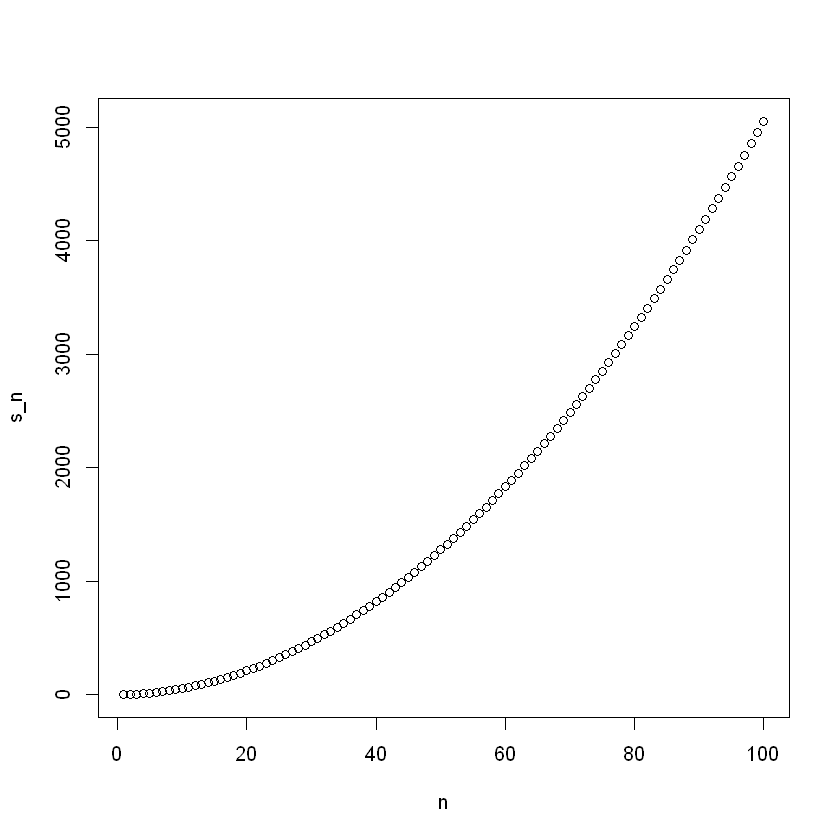

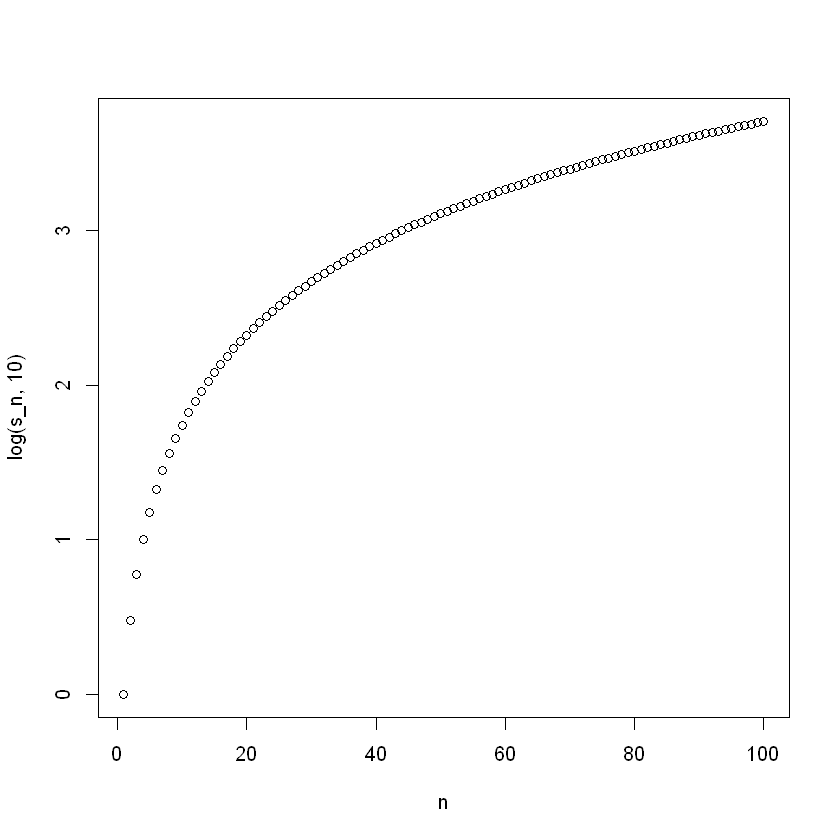

In [18]:
compute_s_n <- function(n) {
    x <- 1:n
    sum(x)
}

m <- 100
s_n <- vector(length = m)
for(n in 1:m) {
    s_n[n] <- compute_s_n(n)
}

n <- 1:m
plot(n, s_n)
plot(n, log(s_n, 10))

### Vectorization and Functionals

Vectors are preferred in R because they are fast, but functions created for scalars don't work with vectors.  Functionals are functions that help apply scalar-based functions to vectors by applying the function to each value in the vector.

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278 3.316625 3.464102 3.605551 3.741657 3.872983 4.000000
[17] 4.123106 4.242641 4.358899 4.472136 4.582576 4.690416 4.795832 4.898979
[25] 5.000000

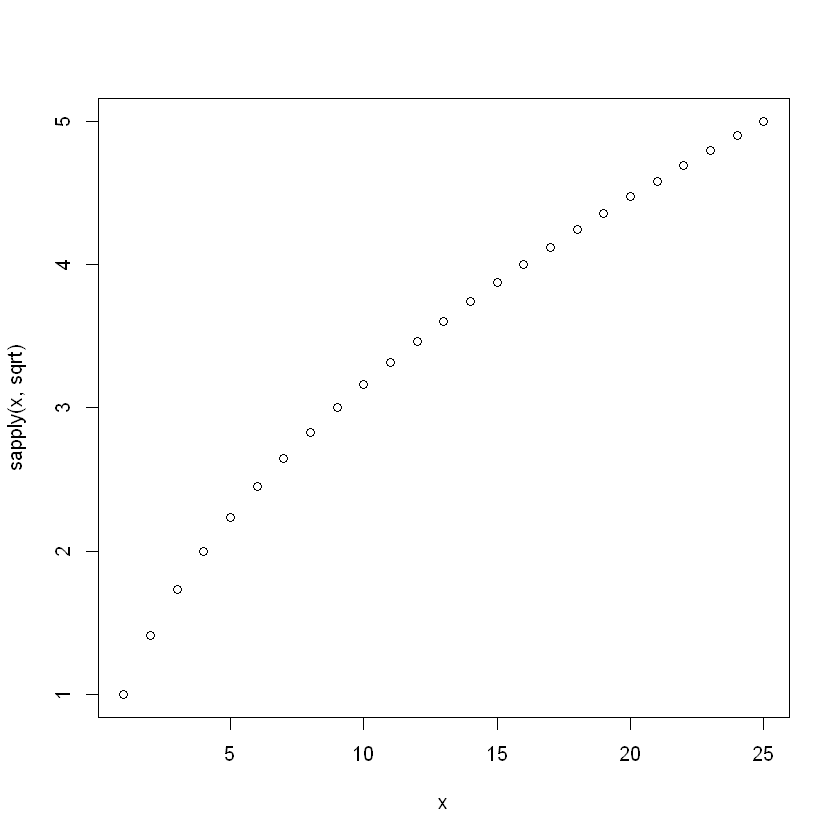

In [21]:
x <- 1:25
sapply(x, sqrt)
plot(x, sapply(x, sqrt))  # Don't use arguments after the function name!

You can use sapply() with your own functions:

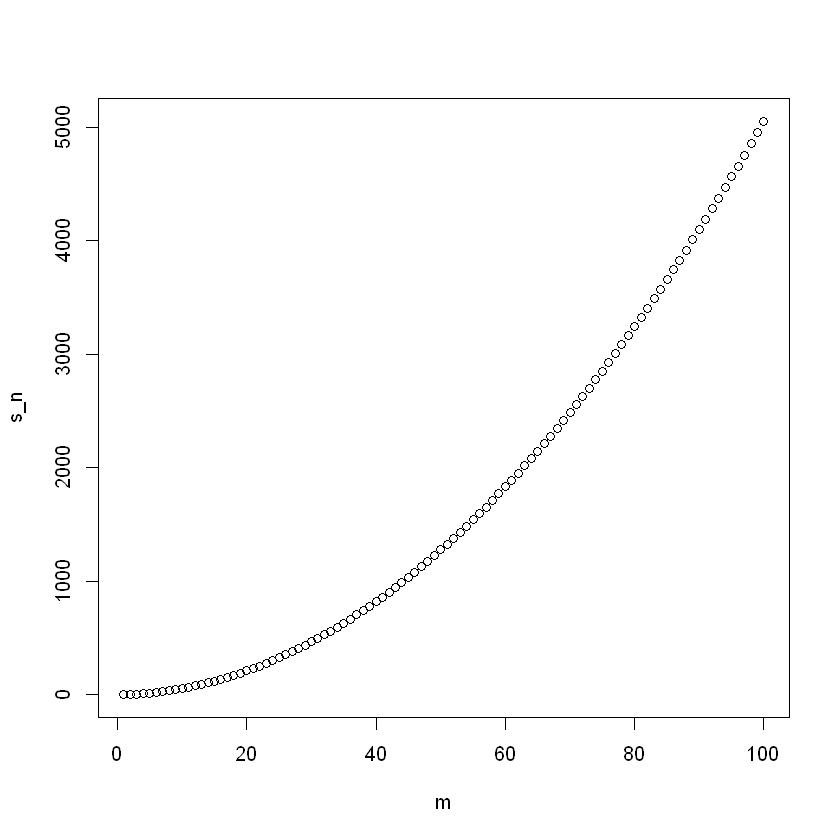

In [31]:
compute_s_n <- function(n) {
    x <- 1:n
    sum(x)
}

m <- 1:100
s_n <- sapply(m, compute_s_n)

plot(m, s_n)

### 3.6 Exercises